# ***QA-VAC NOTEBOOK - Region Selection Plots***

Author: Gabriel Luan Souza de Oliveira.

Last update: 18/01/2022.

## ***Imported Modules***

In [75]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pylab as plt 
import matplotlib.pyplot as mplt
import healpy as hp
from astropy.table import Table
from pylab import cm
from nice_plot import prep_plot as pp

from gavodb import DBManager
import sqlalchemy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ***Loading Data***

In [160]:
%%time
%reload_ext autoreload
#Detection Fraction Map
pids = ['6617', '6618', '6619', '6620', '6621'] # grizY bands
def detfrac_table_loading(pid, verbose = False):
    
    dbm = DBManager()
    detfrac_table_name = dbm.get_tablelist_from_pid(pid)[0]
    columns = dbm.get_db_table_columns_names(detfrac_table_name)
    detfrac_table = dbm.get_db_table_new(detfrac_table_name, columns, limit = False)
    detfrac_table_cool = Table(rows=detfrac_table.T, names=columns)

    if verbose == True:
        print(f'Columns of table {detfrac_table_name}: = ', columns)
        print(detfrac_table_cool)
        print('\nDone!')
    
    return detfrac_table_cool

detfrac_table_loading(pids[2], True)

Columns of table upload.csv_6619: =  ['pixel', 'dec', 'signal', 'ra']
  pixel       dec      signal      ra   
---------- ---------- -------- ---------
72370826.0  -7.820365      1.0 34.508057
72370850.0  -7.801539      1.0 34.486084
72370848.0 -7.8109517      1.0  34.49707
72370849.0  -7.801539      1.0 34.508057
72370851.0 -7.7921267      1.0  34.49707
72376328.0  -7.754479      1.0 34.431152
72376360.0  -7.716834      1.0 34.387207
72376352.0 -7.7356563 0.984375  34.40918
72376330.0  -7.745067      1.0 34.420166
72376331.0 -7.7356563      1.0 34.431152
       ...        ...      ...       ...
72480628.0  -2.808095      1.0 37.023926
72480630.0 -2.7987583      1.0  37.01294
72480607.0  -2.808095      1.0   37.0459
72480629.0 -2.7987583      1.0 37.034912
72480637.0 -2.7800853      1.0  37.01294
72480631.0 -2.7894218      1.0 37.023926
72480255.0 -2.8454423      1.0 37.089844
72482140.0 -2.6773884      1.0 36.870117
72482141.0  -2.668053      1.0 36.881104
72482135.0 -2.6773884      1

## ***Detection Fraction Map (grizY bands)***

/opt/conda/lib/python3.6/site-packages/healpy/projaxes.py:1194: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/opt/conda/lib/python3.6/site-packages/healpy/projaxes.py:1153: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
CPU times: user 5.14 s, sys: 676 ms, total: 5.81 s
Wall time: 5.86 s


<Figure size 1800x1200 with 0 Axes>

<Figure size 1889.76x1062.99 with 0 Axes>

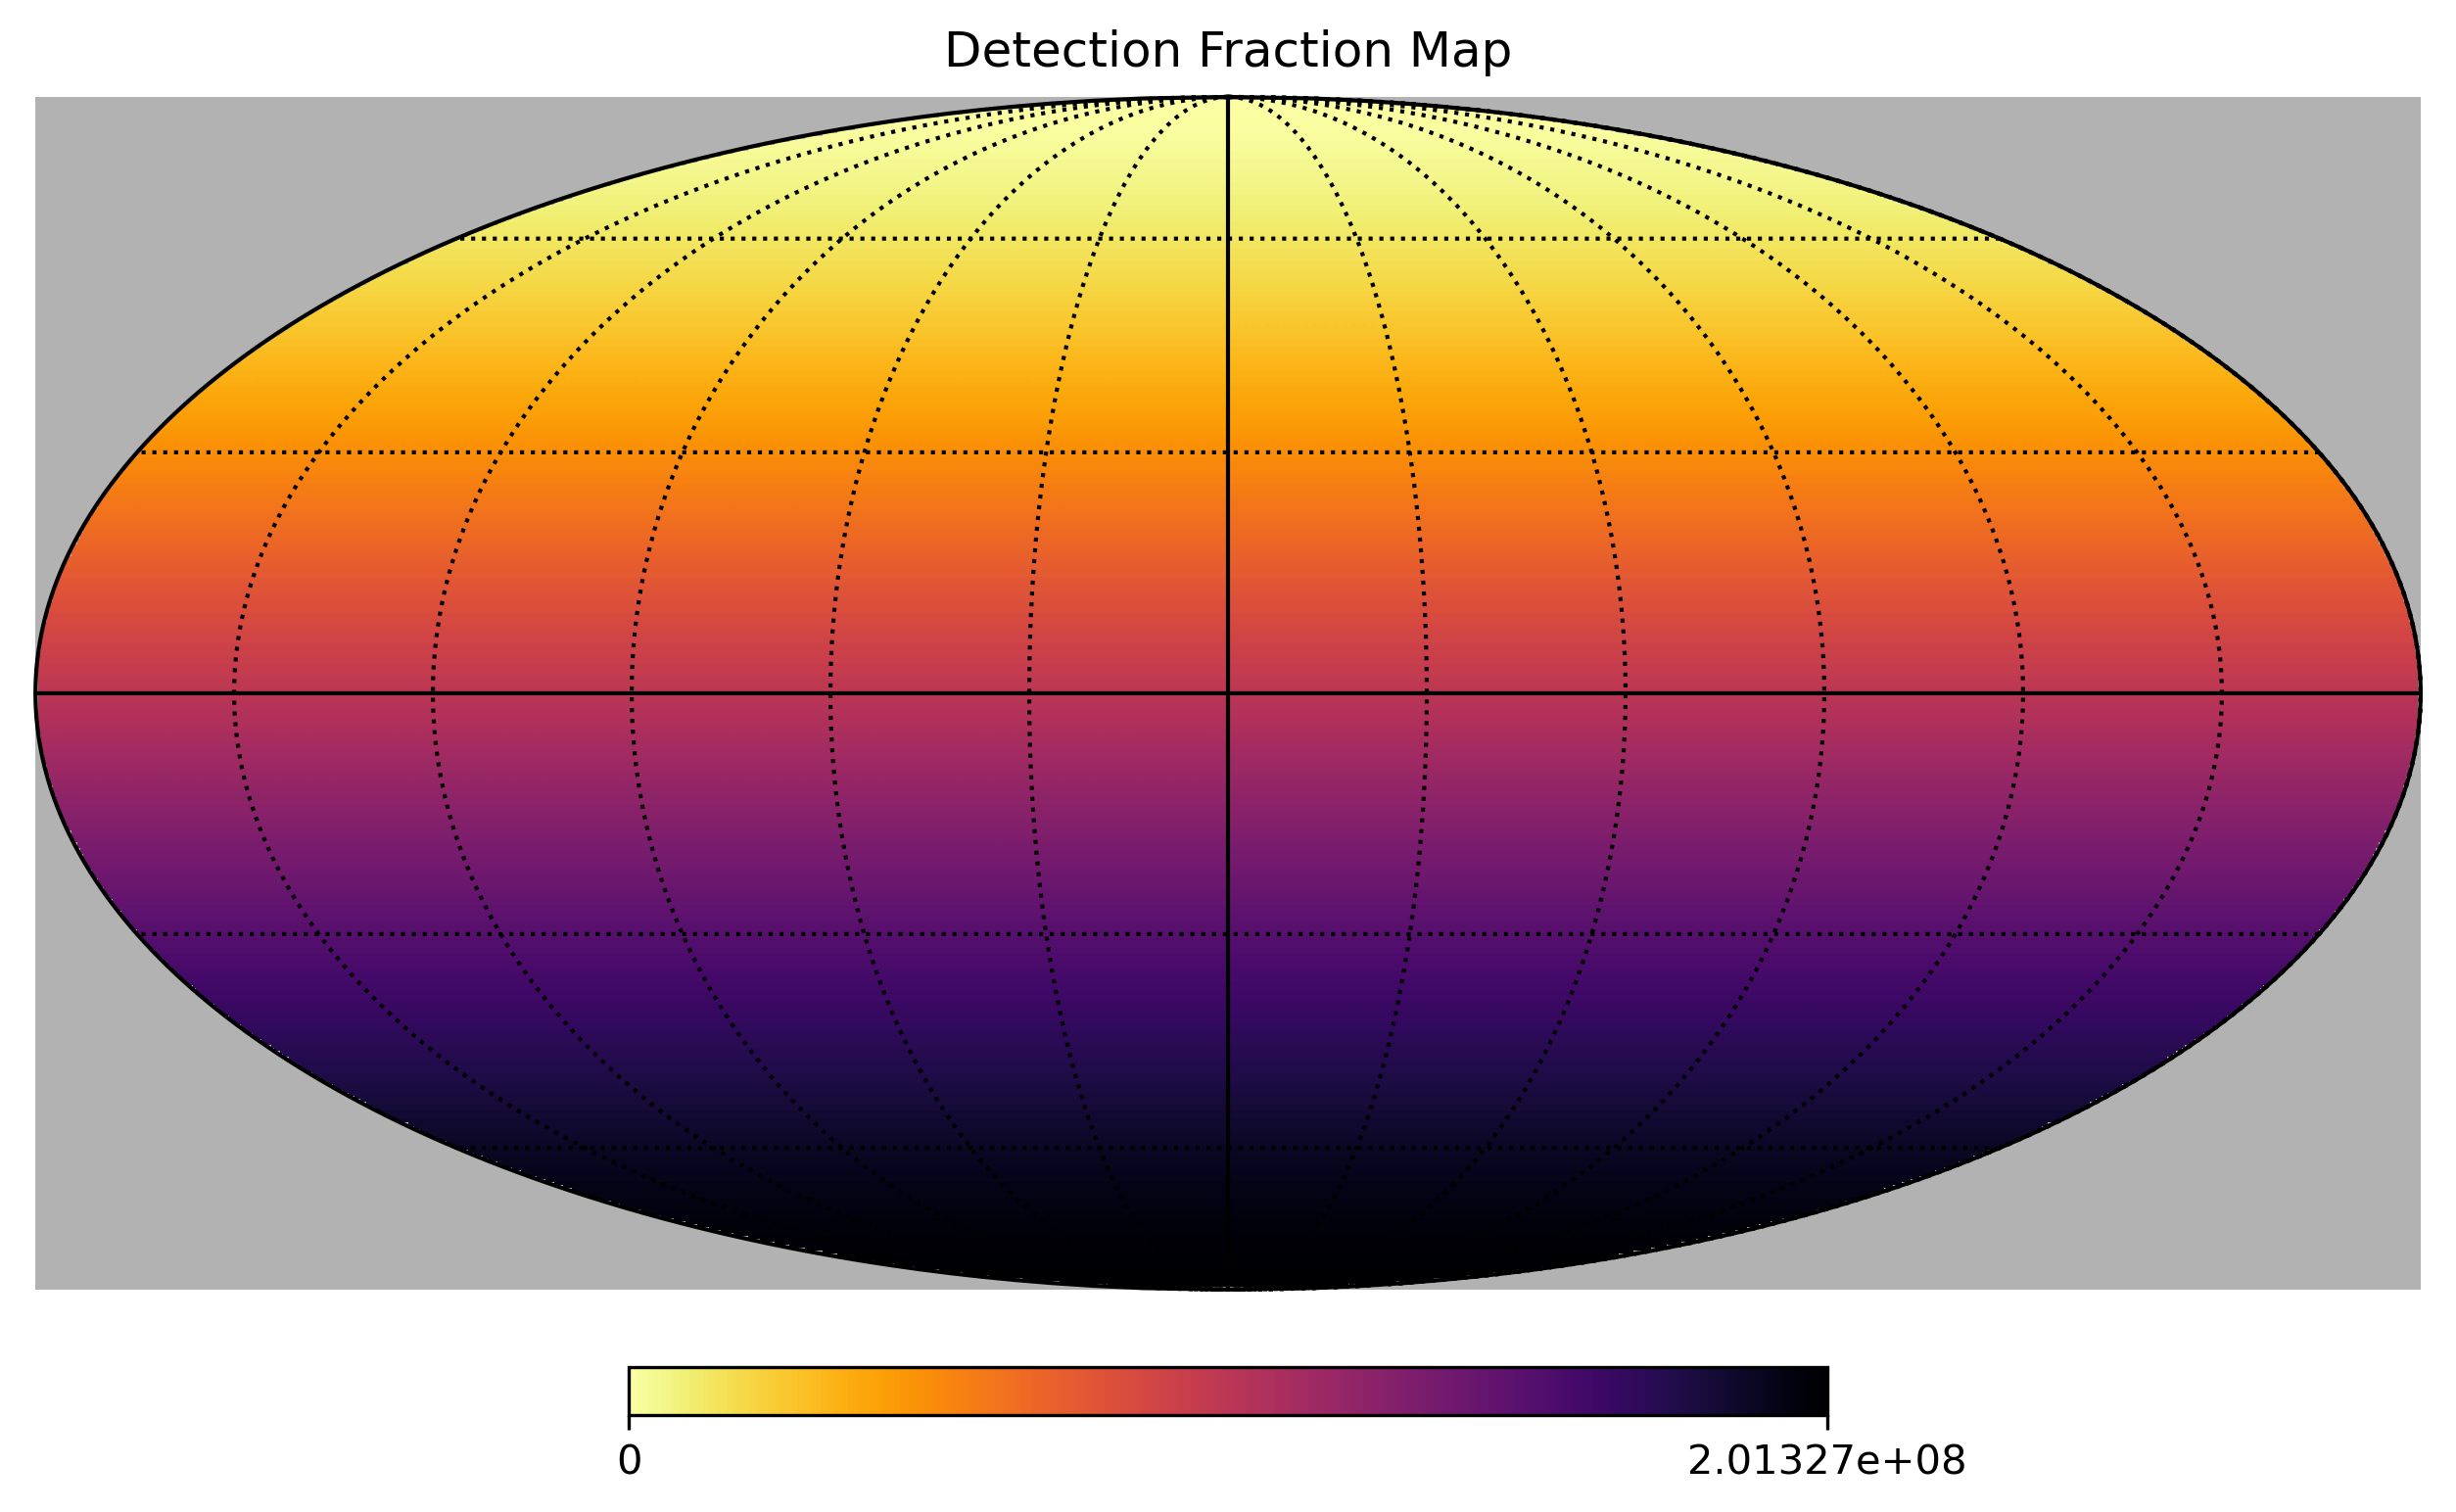

In [179]:
%%time
%reload_ext autoreload
def plot_det_frac_map(table, nside, map_type, verbose = False):
    
    ###-------------------------------------------###
    #                Key informations               #
    ###-------------------------------------------###
    steradian_in_degrees = (180./np.pi)**2
    sky_area = 4*np.pi*steradian_in_degrees   #Area of an sphere measured in degrees^2. Read more on https://www.mathsisfun.com/geometry/steradian.html
    npixels = hp.nside2npix(nside)            #Númeto de pixeis em um Healpix pixelization scheme => 12.0*(nside)**2.0
    area_of_each_pixel = sky_area/(npixels)   #In degrees^2.
    pix_area_arcmin = 3600*area_of_each_pixel #Pixel area in (minutes of degree)².
    
    if verbose == True:
        print('Number of pixels:',npixels,
              '\nSky area:', sky_area,'degrees²',
              '\nArea of each pixel:', area_of_each_pixel, 'degrees²;', pix_area_arcmin,'min^2')
        
    ###-------------------------------------------###
    #                     Plot                      #
    ###-------------------------------------------###

    if map_type == 'cartesian':
        
        # Fig config
        fig, ax = plt.subplots(1, figsize = (16,9))
        ax.set_facecolor('#696969')
    
        # To plot
        sc = ax.scatter(table['ra'], table['dec'], c = table['signal'], vmin = 0, vmax = 1, cmap = cm.inferno_r)

        # Axis Stuff
        ax.set_xlim(30,40)
        ax.set_ylim(-9,-2)
        ax.invert_xaxis()

        # Labels
        ax.set_xlabel('R.A. (degrees)', fontsize = 16)
        ax.set_ylabel('DEC. (degrees)', fontsize = 16)
        ax.set_title("Detection Fraction Map", fontsize = 20, weight='bold')
        ax.tick_params(axis='both', which='major', labelsize=16)

        # Colorbar
        cbar = fig.colorbar(sc, ax = [ax], location = 'right', pad = 0)
        cbar.set_label("Detection Fraction", fontsize = 16, labelpad = 12.0)
        cbar.set_ticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
        cbar.ax.tick_params(labelsize=16)

    if map_type == 'mollview':
        
        #Fig config
        kw = {
        'figsize': (16, 9),
        'nside': nside,
        'ralim': [-75, 120],
        'declim': [-75, 75],
        }

        plt.clf()
        fig = pp(*kw['figsize'])
        
        #To plot
        det_frac_map = -np.inf*np.ones(npixels)
        det_frac_map = np.arange(npixels)
        
        #for i in np.arange(0, len(table['pixel'])):
        #    det_frac_map[int(table['pixel'][i])] = table['signal'][i]
        
        cmap = cm.inferno_r
        cmap.set_under('.7')

        hp.mollview(det_frac_map, min = 0, max = npixels, cmap = cmap, title = "Detection Fraction Map")
        hp.graticule()

        #hp_ax = fig.axes[0]
        #hp_ax.axis('on')
        #hp_ax.grid(color='.5', lw=.5, zorder=0)

        #hp_ax.set_xlabel('R.A. (degrees)')
        #hp_ax.set_ylabel('DEC. (degrees)')
        
det_frac_table = detfrac_table_loading(pids[2], False)
plot_det_frac_map(det_frac_table,4096, 'mollview')


 Visualização dos systematic maps
[ ] Detection Fraction (cada linha da tabela é um pixel, para griz bands).
[ ] N-images
 Visualização dos depth mapas (por bandas (griz), e por SN (5,10)).
Valores de magnitudes limites (seleciona o pixel com o problema, e não o objeto).
 Visualização da foreground objects mask (código bitmap, descrição no gold catalog)
Remove diversos objetos (estrelas, aglomerados globulares, galáxias anãs próximas) e a área próxima a eles.
 Visualização do footprint map (é 0 ou 1 )
É o mapa resultante a partir dos cortes feitos nos mapas anteriores.
 Cálculo da área efetiva (depende dos cortes feitos)
Cada pixel tem que ter area ponderada pelo detection fraction (somatório dos detection fractions).
Usando datashadder (ser interativo, inclusive os valores de densidade):

 Distribuição espacial dos objetos (mapa de densidades)
 Distribuição espacial do redshift médio/mediano
 Distribuição espacial do erro no redshift (erro médio)

In [ ]:
#quando não se tem ra e dec

###-------------------------------------------###
#                MAP construction               #
###-------------------------------------------###

det_frac_map = -np.inf*np.ones(npixels)

for i in np.arange(0, len(indexs)):
    det_frac_map[indexs[i]] = det_frac[i]

ra, dec = hp.pix2ang(nside,indexs, lonlat = True)

ra[ra>180] -= 360
